<a href="https://colab.research.google.com/github/Masum06/Text2App/blob/master/notebooks/data_synthesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers==4.5.0
# !pip install PyDictionary

     |████████████████████████████████| 2.1 MB 11.1 MB/s 
     |████████████████████████████████| 3.3 MB 34.4 MB/s 
     |████████████████████████████████| 895 kB 34.2 MB/s 


In [2]:
!git clone https://github.com/Masum06/Text2App.git

Cloning into 'Text2App'...
remote: Enumerating objects: 611, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 611 (delta 145), reused 80 (delta 42), pack-reused 388
Receiving objects: 100% (611/611), 241.79 MiB | 20.16 MiB/s, done.
Resolving deltas: 100% (224/224), done.
Checking out files: 100% (220/220), done.


In [3]:
cd Text2App

/content/Text2App


# Helper functions

In [4]:
import random
import string
# from PyDictionary import PyDictionary
from datetime import datetime
import re

random.seed(datetime.now())
# dictionary=PyDictionary()

all_vis_components = ['button', 'switch', 'accelerometer', 'ball', 'text2speech', 'player',
                      'video_player', 'textbox', 'passwordtextbox', 'timepicker', 'datepicker',
                      'camera']
colors = ["red", "green", "black", "cyan", "pink", 
          "magenta", "blue", "light_gray", "orange", 
          "yellow", "dark_gray", "gray"]

print(all_vis_components)

['button', 'switch', 'accelerometer', 'ball', 'text2speech', 'player', 'video_player', 'textbox', 'passwordtextbox', 'timepicker', 'datepicker', 'camera']


In [5]:
string_num = -1
int_num = -1
float_num = -1

def getStr():
  global string_num 
  string_num += 1
  return "string"+str(string_num)

def getNum():
  global int_num 
  int_num += 1
  return "number"+str(int_num)

def getColor():
  global colors
  return random.choice(colors)

def getSyn(word):
  syns = dictionary.synonym(word)
  if syns:
    return random.choice([word] + syns)
  else:
    return word

def getArticle(word):
  if word[0] in 'aeiou':
    return "an"
  else:
    return "a" 

# Constants

In [6]:
ValueComponents = {
    "textbox": {"nl": ["the textbox text", "the text in the textbox", "the text in the box", "the textbox content", "the text"], "sar": "textboxtext"},
    "passwordtextbox": {"nl": [""], "sar": "passwordboxtext"},
    "timepicker": {"nl": ["the time", "time", "what time it is", "what is the time"], "sar": "time"}, 
    # "datepicker": {"nl": ["the date and time", "date and time", "date", "the date", "what is the date"], "sar": "date"}
    }

In [7]:
events = {
    "button": {"clicked": ["clicked", "pressed", "touched"]},
    "switch": {"flipped": ["fliped", "clicked", "pressed", "touched"]},
    "accelerometer": {"shaken": ["shaken", "vibrated"]},
    "ball": {"flung": ["flung", "thrown", "hit"], "reach_edge": ["reaches edge", "touches edge", "cornered"]}
} 

In [8]:
actions = {
    "player": {
        "start": ["play the music", "play the sound", "play", "start the player", "start the music", "initiate player"], 
        "stop": ["stop the music", "stop sound", "stop the sound", "stop"]
        },
    "video_player": {
        "start": ["play the video", "play the clip", "play", "start the video player", "start the video", "initiate video"], 
        "stop": ["stop the video", "stop video", "stop the clip", "stop"]
        },
    "text2speech": ["speak"],
    "ball": ["radius", "speed", "header", "motion", "bounce"],
    "camera": ["take a picture", "take picture", "click", "capture", "take a photo", "click a photo", "capture a photo",
               "open camera", "initiate camera", "open the camera", "open camera and take a picture", "open camera and take a photo"
               "open the camera and click"]
}

In [9]:
arguments = ["textbox", "passwordtext", 'time'] #date

In [10]:
numbers = [["", "first", "1st", "earlier", "initial"] , ["second", "2nd", "next", "later", "following", "the other", "the later"], 
           ["third", "3rd"], ["fourth", "4th"], ["fifth", "5th"], ["sixth", "6th"]]

In [11]:
vis_components = ['textbox', 'button', 'text2speech', 'ball', 'accelerometer', 'video_player', 
                  'switch', 'player', 'label', 'timepicker', 'passwordtextbox', 'camera'] #, 'datepicker', 
non_repeat_vis_components = ['accelerometer', 'ball', 'text2speech', 'camera']
repeat_vis_components = list(set(vis_components) - set(non_repeat_vis_components))
components_with_text = ['button', 'switch', 'label'] 
comp_with_src = ['video_player', 'player']
invisible_components = ['text2speech', 'accelerometer', 'ball']
end_with_es = ['text2speech', 'textbox']
canvas_components = ['ball']

event_components = ["button", "switch", "accelerometer", "ball"]
action_components = ["player", "video_player", "text2speech", "ball", "label", "camera"]
value_components = ["textbox", "timepicker"] # "passwordtextbox", "datepicker",
rand_source = {"video_player": ["video", "clip"], "player": ["audio", "music", "sound"]}

component_alias = {"textbox": ["textbox", "text box"], "button": ["button"], "ball": ["ball", "circle"], 
                   "text2speech": ["text2speech", "text to speech", "speech"], 
                   "accelerometer": ["accelerometer", "motion sensor", "vibration sensor", "movement sensor", "shake sensor"], 
                  #  "datepicker": ["datepicker", "date picker"], 
                   "timepicker": ["timepicker", "time picker", "time selector"], 
                   "switch": ["switch"], "player": ["music player", "player", "audio player", "music", "audio"], 
                   "video_player": ["video player", "video"], "label": ["label"],
                   "passwordtextbox": ["password box", "pasword text box", "password field", "passwordbox", "passwordtextbox"],
                   "camera": ["camera"]
                   }

MAX_NUMBER_OF_COMPONENT = 12
SAME_COMPONENT_LIMIT = 5

# Classes

In [12]:
class EventComponent:
  component = ""
  event = ""
  nl = []
  number = 0
  event_comp_count = 1

  def __init__(self, component="", number=1, event_comp_count=1):
    self.component = component
    self.event = random.choice(list(events[self.component].keys())) # random.choice(events[self.component]["event"]) 
    self.number = number
    self.event_comp_count = event_comp_count

  def getNL(self):
    if self.component in non_repeat_vis_components or self.event_comp_count==1:
      num = ""
    else:
      num = random.choice(numbers[self.number-1])+" "
    
    event_choice = random.choice(list(events[self.component].keys()))
    comp_nl = random.choice(events[self.component][event_choice])
    new_nl = random.choice(["when", "if"])+" the "+ num + random.choice(component_alias[self.component]) +" is "+ comp_nl + ", "
    return new_nl

In [13]:
class ActionComponent:
  component = ""
  number = 0
  action_comp_count = 1
  # arguments = []
  val_comps = []
  arg = ""
  nl = ""
  set_src = False

  def __init__(self, component, number=1, val_comps=[], action_comp_count=1, set_src=False):
    self.component = component
    self.number = number
    self.actions = actions
    self.val_comps = val_comps
    self.set_src = set_src
    self.arg = self.getArg()
    self.action_comp_count = action_comp_count

  def getNL(self):
    # new_nl = random.choice(["set", "make"]) + " " + random.choice(self.actions) + " "
    return self.nl

  def getPlayerArg(self):
    arg = random.choice(["start", "stop"])
    nl_arg = arg
    alter = random.choice([0,1])
    if alter:
      if arg == "start":
        nl_arg = "play"
      else:
        nl_arg = "pause"

    self.nl = nl_arg + random.choice([" the <num> player", " the music <num> player", " the music", " music", " player", " audio"])
    if self.action_comp_count > 1:
      self.nl = self.nl.replace("<num>", random.choice(numbers[self.number-1]))
    else:
      self.nl = self.nl.replace("<num> ", "")

    ## Set the source for the music
    if self.set_src:
      vis_comp = "player"
      mid_text = ""
      choose_random = random.choice([0,1])
      if choose_random: # with 50% possibility set the source to a random video or music
        # mid_text = "random_"+ vis_comp + "_source"
        rand_src = " with a random " + random.choice(rand_source[vis_comp]) # 25%  time mention random source
        no_src = "" # 25% times mention no source at all
        self.nl += random.choice([rand_src, no_src])
      else:  # 50% time provide a source
        mid_text = getStr()
        self.nl += random.choice([" ", " with source "]) + mid_text
        return "<"+ arg + ">" + " <src> " + mid_text + " </src>"

    return "<"+arg+">"
  
  def getVideoPlayerArg(self):
    arg = random.choice(["start", "stop"])
    nl_arg = arg
    alter = random.choice([0,1])
    if alter:
      if arg == "start":
        nl_arg = "play"
      else:
        nl_arg = "pause"

    self.nl = nl_arg + random.choice([" the <num> video player", " the <num> video", " the <num> clip", " <num> video", \
                                      " <num> video player", " video", " video player"])
    if self.action_comp_count > 1:
      self.nl = self.nl.replace("<num>", random.choice(numbers[self.number-1]))
    else:
      self.nl = self.nl.replace("<num> ", "")

    ## Set the source for the video
    if self.set_src:
      vis_comp = "video_player"
      mid_text = ""
      choose_random = random.choice([0,0,1])
      if choose_random: # with 50% possibility set the source to a random video or music
        # mid_text = "random_"+ vis_comp + "_source"
        rand_src = " with a random " + random.choice(rand_source[vis_comp]) # 25%  time mention random source
        no_src = "" # 25% times mention no source at all
        self.nl += random.choice([rand_src, no_src])
      else:  # 50% time provide a source
        mid_text = getStr()
        self.nl += random.choice([" ", " with source "]) + mid_text
        return "<"+ arg + ">" + " <src> " + mid_text + " </src>"

    return "<"+arg+">"

  def getT2SArg(self):
    use_val_comp = random.choice([0,1,1,1]) # 75% chance of choosing value component
    if len(self.val_comps)>0 and use_val_comp:
      val_name = random.choice(self.val_comps)
      self.val_comps.remove(val_name)
      val = val_name[:-1] # Number of value component cannot be more than 9 (a single digit)
      self.nl = random.choice(["say ", "speak ", "tell ", "speak out "]) + random.choice(ValueComponents[val]["nl"])
      return "<"+ValueComponents[val]['sar']+val_name[-1]+">"
    else:
      val = getStr()
      self.nl = random.choice(["say ", "speak ", "tell ",  "speak out "]) + val
      return val

  def getLabelArg(self):
    use_val_comp = random.choice([0,1,1,1]) # 75% chance of choosing value component
    
    self.nl = random.choice(["set <num> label text to ", "set the <num> label text to ", "set <num> label to ", "set <num> label "])
    if self.action_comp_count > 1:
      self.nl = self.nl.replace("<num>", random.choice(numbers[self.number-1]))
    else:
      self.nl = self.nl.replace(" <num>", "")

    if len(self.val_comps)>0 and use_val_comp:
      val_name = random.choice(self.val_comps)
      self.val_comps.remove(val_name)
      val = val_name[:-1] # Number of value component cannot be more than 9 (a single digit)
      self.nl += random.choice(ValueComponents[val]["nl"])
      val = "<"+ValueComponents[val]['sar']+val_name[-1]+">"
    else:
      val = getStr()
      self.nl += val

    return val
  
  def getBallArg(self):
    arg = random.choice(['radius', 'color', 'speed', 'heading', 'bounce', 'motion'])
    if arg in ['speed', 'radius']:
      val = getNum() #random.choice(['increase', 'decrease'])
      self.nl = "set the " + arg + " to " + val
      return "<"+arg+"> "+val+" </"+arg+">"
    elif arg == 'bounce':
      self.nl = "bounce the ball" 
      return "<bounce>"
    elif arg == 'color':
      val = random.choice(colors)
      self.nl = "set ball color to "+ val.replace("_", " ")
      return "<"+arg+"> <"+val+"> </"+arg+">"
    elif arg == 'motion':
      self.nl = random.choice(["set ball in motion ", "move the ball ", "swing the ball "])
      return "<motion>"
    elif arg == 'heading':
      val = getNum()
      self.nl = "set ball header to "+ val
      return "<"+arg+"> "+val+" </"+arg+">"

  def getCameraArg(self):
    self.nl = random.choice(actions['camera'])+' '
    return '<capture_and_show>'

  def getArg(self):
    if self.component == "player":
      return self.getPlayerArg()
    elif self.component == "video_player":
      return self.getVideoPlayerArg()
    elif self.component == "text2speech":
      return self.getT2SArg()
    elif self.component == "ball":
      return self.getBallArg()
    elif self.component == "label":
      return self.getLabelArg()
    elif self.component == "camera":
      return self.getCameraArg()
    else:
      return ""
  
  def getNLArg(self):
    arg = self.arg
    return (self.nl, arg)


# NL_SAR generation code

In [14]:
def generate_nl_sar():
  # global vis_components, non_repeat_vis_components, repeat_vis_components
  global string_num, int_num
  string_num = -1
  int_num = -1

  total_vis_components = random.randint(1, MAX_NUMBER_OF_COMPONENT) # limited to fit in screen # CX: 11C7
  selected_components = random.sample(vis_components*SAME_COMPONENT_LIMIT, total_vis_components) # 

  NL = random.choice(["create <app> ", "make <app> ", "<app> ", "<app> ", "give me <app> "])
  app = random.choice(["app", "mobile app", "application", "mobile application", "software"])
  initial = random.choice([getArticle(app)+" ", ""])
  NL = NL.replace("<app>", initial+app)
  NL += random.choice(["with ", "that has ", "consisting ", "containing ", "having ", "consisting of "])
  SAR = ["<complist> "] #Change to <comp>

  comps_count = {}
  # comps_used_count = {}
  event_comp_used_count = {}
  action_comp_used_count = {}
  vis_comp_used_count = {}
  for comp in vis_components:
    comps_count[comp] = 0
    # comps_used_count[comp] = 0
    vis_comp_used_count[comp] = 0
    action_comp_used_count[comp] = 0
    event_comp_used_count[comp] = 0

  event_comps = []
  action_comps = []
  value_comps = []

  # total_vis_components = random.randint(1, MAX_NUMBER_OF_COMPONENT) # limited to fit in screen # CX: 12C5
  # selected_components = random.sample(vis_components*SAME_COMPONENT_LIMIT, total_vis_components)

  for component in selected_components:
    if component in non_repeat_vis_components and comps_count[component]:
      selected_components.remove(component)
      total_vis_components-=1
    else:
      comps_count[component] += 1
      if component in event_components:
        event_comps.append(component)
      if component in action_components:  # Same component can be both event and action, such as "ball"
        action_comps.append(component)
      if component in value_components:
        # if comps_count[component] > 1:
        value_comps.append(component+str(comps_count[component]))
  
  unique_components = list(set(selected_components))

  for i in range(len(selected_components)):
    vis_comp = selected_components[i]

    hide = random.choice([0,0,0,0,0,1]) ## Hide 1/6 components from component list, and NL definition
    if hide:
      # print(vis_comp, "HIDDEN!")
      continue

    vis_comp_number =  comps_count[vis_comp]
    vis_comp_nl = random.choice(component_alias[vis_comp])
    article = getArticle(vis_comp_nl)

    vis_comp_used_count[vis_comp] += 1


    mid_text = ""
    
    if i == total_vis_components - 1 and len(selected_components) > 1: # j == vis_comp_number - 1 and 
      NL += "and "

    give_text = random.choice([0,0,0,1]) # MH: 25% chance of giving a text

    if vis_comp in comp_with_src:
      if give_text: # with 25% possibility set the source to a random video or music
        mid_text = "random_"+ vis_comp + "_source"
        rand_src = article + " " + vis_comp_nl + " with a random " + random.choice(rand_source[vis_comp]) # 12.5%  time mention random source
        no_src = article + " " + vis_comp_nl # 12.5% times mention no source at all
        NL += random.choice([rand_src, no_src])
      else:
        mid_text = getStr()
        NL += article + " " + vis_comp_nl + " with source " + mid_text
    elif vis_comp in components_with_text:
      if give_text:
        mid_text = getStr()
        NL += article + " "+ vis_comp_nl + random.choice([" named ", " with text ", " called "]) + mid_text
      else:
        mid_text = vis_comp + str(vis_comp_used_count[vis_comp]) # MH: DEFAULT TEXT ARGUMENT
        NL += article + " " + vis_comp_nl 
    else:
      NL += article + " " + vis_comp_nl 


    if i == total_vis_components - 1: # j == vis_comp_number - 1 
      NL += " . "
    else:
      NL += " , "

    ## Generate SAR
    if vis_comp in components_with_text+comp_with_src:
      sar_begin_token = "<token> "
      sar_end_token = "</token> "
      SAR.append(sar_begin_token.replace("token", vis_comp))
      SAR.append(mid_text + " ")
      SAR.append(sar_end_token.replace("token", vis_comp))
    else:
      SAR.append("<"+vis_comp+"> ")



  ## Handling plural form
  # if vis_comp_number > 1:
  #   if vis_comp in end_with_es: #add component to this list if it end in es
  #     NL = NL.replace(vis_comp, (vis_comp + "es"))
  #   else: 
  #     NL = NL.replace(vis_comp, vis_comp + "s")

  #Generate SAR for canvas
  # for number in range(vis_comp_number):
  # if vis_comp in canvas_components:
  #   if "<canvas> " in SAR:
  #     idx = SAR.index("</canvas> ") - 1
  #     SAR.insert(idx , "<ball> ")
  #   else:
  #     SAR.append("<canvas> ")
  #     SAR.append("<ball> ")
  #     SAR.append("</canvas> ")
  # else:
  #   sar_token = "<token> "
  #   SAR.append(sar_token.replace("token", vis_comp))

  NL.replace('and .', '.')
  NL.replace('<complist> </complist>', "")
  SAR.append("</complist>") #Change to </comp>
  SAR_str = ""
  for token in SAR:
    SAR_str += token

  sar = SAR_str


  ## SAR for code components
  # print(selected_components)
  # print(event_comps)
  # print(action_comps)
  # print(value_comps)

  if len(action_comps)>0 and len(event_comps)>0:
    sar += " <code> "
    for event_comp in event_comps:
      if action_comps:
        event_comp_used_count[event_comp] += 1
        event_comp_num = event_comp_used_count[event_comp]
        event_comp_count = comps_count[event_comp]
        event_object = EventComponent(event_comp, event_comp_num, event_comp_count)
        NL += event_object.getNL()
        # event = event_object.event #random.choice(events[event_comp])
        sar += "<"+ event_comp + str(event_comp_num) + event_object.event + "> "

        action_comp_name = random.choice(action_comps)
        action_comp_used_count[action_comp_name] += 1
        action_comp_num = action_comp_used_count[action_comp_name]
        action_comps.remove(action_comp_name)
        action_comp_count = comps_count[action_comp_name]

        ## Hidden video, audio source, pop up in player
        set_src = False
        if action_comp_name in comp_with_src and action_comp_name not in sar:
          set_src = True

        # Decide whether to use value comp, or which one to use
        # Send or not send that value comp
        # Remove from the value comp list
        action_object = ActionComponent(action_comp_name, action_comp_num, value_comps, action_comp_count, set_src)
        value_comps = action_object.val_comps

        (nl, arg) = action_object.getNLArg()
        ## Parse <src> </src> and put it back into <video> </video>

        action_comp_num_str = str(action_comp_num) if action_comp_name in non_repeat_vis_components else ""
        sar += "<"+action_comp_name + str(action_comp_num) + "> " + arg + " </"+action_comp_name + str(action_comp_num) + "> "
        sar += "</"+ event_comp + str(event_comp_num) + event_object.event + "> "
        NL += nl + " . "

    sar += "</code>"


  NL = ' '.join(NL.split())
  sar = ' '.join(sar.split())
  return NL, sar


* Keep a count, and name them First, Second. Similar to Button.
* <complist> </complist> should be eliminated

In [20]:
import re

while True:
  NL, sar = generate_nl_sar()
  match = re.search("<switch\dflipped> <text2speech\d>", sar)
  if match:
    print(NL)
    print(sar)
    break

create application consisting a switch , a time picker , a speech , if the switch is clicked, speak string0 . when the vibration sensor is vibrated, start the player string1 .
<complist> <switch> switch1 </switch> <timepicker> <text2speech> </complist> <code> <switch1flipped> <text2speech1> string0 </text2speech1> </switch1flipped> <accelerometer1shaken> <player1> <start> <src> string1 </src> </player1> </accelerometer1shaken> </code>


# BERT Mutation

In [16]:
from transformers import AutoModelWithLMHead, AutoTokenizer
import torch

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModelWithLMHead.from_pretrained("distilbert-base-cased").cuda()

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:762: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/263M [00:00<?, ?B/s]

In [17]:
def mutate(sentence, position):
  tokens = sentence.split()
  word = tokens[position]
  mask = tokenizer.mask_token
  tokens[position] = mask
  masked_sentence = ' '.join(tokens)

  input = tokenizer.encode(masked_sentence, return_tensors="pt").cuda()
  mask_token_index = torch.where(input == tokenizer.mask_token_id)[1].cuda()

  token_logits = model(input)[0].cuda()
  mask_token_logits = token_logits[0, mask_token_index, :].cuda()
  top_tokens = torch.topk(mask_token_logits, 10, dim=1).indices[0].tolist()

  predictions = []
  for token in top_tokens:
    predicted_word = tokenizer.decode([token]).lower()
    if "##" not in predicted_word:
      predictions.append(predicted_word)

  if len(predictions)> 0:
    decreasing_weights = [i for i in range(len(predictions) ,0, -1)]
    mutated_word = random.choices(predictions, weights=decreasing_weights, k=1)[0]
    # print(mutated_word)
  else:
    mutated_word = word
    # print("not mutated")
  tokens[position] = mutated_word
  mutated_sentence = ' '.join(tokens)

  return mutated_sentence

In [18]:
def mutate_sentence(sentence, mutation_percent):
  mutate_index = random.choices([i for i in range(len(sentence.split()))], k=int(len(sentence.split())*mutation_percent + 0.5))
  for i in mutate_index:
    sentence = mutate(sentence, i)
  return sentence

# Generating dataset

In [ ]:
nl_train = []
sar_train = []
nl_unseen = []
sar_unseen = []

In [64]:
for i in range(5000):
  nl, sar = generate_nl_sar()
  if len(sar.split()) < 3:
    continue
  if "<textboxtext4>" in sar:
    print(sar)
  ## Mutate 10% words in 10% NL
  nl = mutate_sentence(nl, 0.1)
  match = re.search("<switch\dflipped> <text2speech\d>", sar)
  if match:
    nl_unseen.append(nl)
    sar_unseen.append(sar)
  else:
    nl_train.append(nl)
    sar_train.append(sar)
  if i%100==0:
    print(i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [65]:
d = {}

all_tokens = ' '.join(sar_train+sar_unseen).split()
for s in all_tokens:
  if s not in d:
    d[s] = 0
  d[s] += 1

In [66]:
sorted_d = sorted(d.items(), key=lambda item: item[1])
sorted_d.reverse()
sorted_d

[('</complist>', 54182),
 ('<complist>', 54182),
 ('</code>', 42947),
 ('<code>', 42947),
 ('string0', 38226),
 ('<passwordtextbox>', 24938),
 ('</video_player>', 24911),
 ('<video_player>', 24911),
 ('</button>', 24872),
 ('<button>', 24872),
 ('<timepicker>', 24818),
 ('<textbox>', 24800),
 ('</label>', 24763),
 ('<label>', 24763),
 ('</player>', 24735),
 ('<player>', 24735),
 ('</switch>', 24692),
 ('<switch>', 24692),
 ('string1', 20386),
 ('<accelerometer>', 19942),
 ('<ball>', 19920),
 ('<camera>', 19807),
 ('<text2speech>', 19787),
 ('</button1clicked>', 19202),
 ('<button1clicked>', 19202),
 ('</switch1flipped>', 19098),
 ('<switch1flipped>', 19098),
 ('</accelerometer1shaken>', 18825),
 ('<accelerometer1shaken>', 18825),
 ('</ball1>', 15884),
 ('<ball1>', 15884),
 ('button1', 15124),
 ('label1', 15116),
 ('switch1', 15051),
 ('<stop>', 14996),
 ('<start>', 14646),
 ('</video_player1>', 13425),
 ('<video_player1>', 13425),
 ('</player1>', 13300),
 ('<player1>', 13300),
 ('</lab

In [67]:
import pandas as pd
df = pd.DataFrame({'NL':nl_train, 'SAR': sar_train})
df_unseen = pd.DataFrame({'NL':nl_unseen, 'SAR': sar_unseen})

In [79]:
df = df.drop_duplicates()
df_unseen = df_unseen.drop_duplicates()
df = df.reset_index(drop=True)[:50000]
df_unseen = df_unseen.reset_index(drop=True)[:3500]
df

,NL,SAR
0,"make an app that has a shake sensor , a video ...",<complist> <accelerometer> <video_player> rand...
1,"make software with a mouse , a pasword text re...",<complist> <button> button1 </button> <passwor...
2,give me software consisting a label with text ...,<complist> <label> string0 </label> <accelerom...
3,"make an app with a time selector , a button , ...",<complist> <timepicker> <button> button1 </but...
4,make mobile application consisting of a text b...,<complist> <textbox> <textbox> </complist>
...,...,...
49995,create software consisting of a passwordbox .,<complist> <passwordtextbox> </complist>
49996,create the application containing a movement s...,<complist> <accelerometer> <video_player> rand...
49997,"app store has a time selector , a textbox , a ...",<complist> <timepicker> <textbox> <textbox> <a...
49998,create a mobile application consisting of a me...,<complist> <passwordtextbox> </complist>


In [80]:
df_unseen

,NL,SAR
0,"create an app containing a textbox , a switch ...",<complist> <textbox> <switch> switch1 </switch...
1,a mobile app containing audio video with backg...,<complist> <video_player> string0 </video_play...
2,"make software having a passwordtextbox , a swi...",<complist> <passwordtextbox> <switch> switch1 ...
3,"switch with a switch , a camera , a text2speec...",<complist> <switch> switch1 </switch> <camera>...
4,"a software consisting a label , a circle , a c...",<complist> <label> label1 </label> <ball> <cam...
...,...,...
3495,"mobile mobile app consisting an audio player ,...",<complist> <player> random_player_source </pla...
3496,make application consisting of a video on sour...,<complist> <video_player> string0 </video_play...
3497,"a mobile app requires a camera , and a switch ...",<complist> <camera> <switch> switch1 </switch>...
3498,"give me software consisting a text2speech , a ...",<complist> <text2speech> <label> label1 </labe...


### Code length distribution

In [81]:
code_len = []
for i in range(len(sar_train)):
  code_len.append(len(sar_train[i].split()))

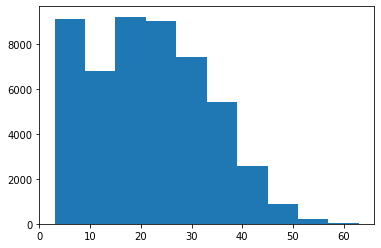

In [82]:
import matplotlib.pyplot as plt

plt.hist(code_len)
plt.show() 

In [83]:
np.max(code_len)

63

### Drop

In [84]:
df.to_csv("nl_sar_combined.csv", index=False)
df.to_csv("nl_sar_unseen.csv", index=False)

In [85]:
from google.colab import files

files.download("nl_sar_combined.csv")
files.download("nl_sar_unseen.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train-valid-test split

In [86]:
train_frac = 0.8
valid_frac = 0.1

train = df[:int(len(df)*train_frac)]
valid = df[int(len(df)*train_frac): int(len(df)*(train_frac+valid_frac))]
test = df[int(len(df)*(train_frac+valid_frac)): ]

train.to_csv("nl_sar_train.csv", index=False)
test.to_csv("nl_sar_test.csv", index=False)
valid.to_csv("nl_sar_valid.csv", index=False)

len(train), len(valid), len(test)

(40000, 5000, 5000)

In [87]:
files.download("nl_sar_train.csv")
files.download("nl_sar_test.csv")
files.download("nl_sar_valid.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
if not os.path.exists("./Synthesized_Data"):
  os.makedirs("./Synthesized_Data")

In [ ]:
!cp *.csv ./Synthesized_Data/

In [ ]:
# For Colab
from google.colab import files

!zip -r Synthesized_Data Synthesized_Data/*

files.download('Synthesized_Data.zip')

  adding: Synthesized_Data/nl_sar_combined.csv (deflated 88%)
  adding: Synthesized_Data/nl_sar_test.csv (deflated 88%)
  adding: Synthesized_Data/nl_sar_train.csv (deflated 88%)
  adding: Synthesized_Data/nl_sar_valid.csv (deflated 88%)
  adding: Synthesized_Data/unseen_all.csv (deflated 88%)
  adding: Synthesized_Data/unseen_test.csv (deflated 88%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Synthetic data anlaytics

In [ ]:
nl_len = []
sar_len = []
for nl in nl_list:
  nl_len.append(len(nl.split()))

for sar in sar_list:
  sar_len.append(len(sar.split()))

In [ ]:
sum(nl_len)/len(nl_len)

30.701854545454545

In [ ]:
sum(sar_len)/len(sar_len)

16.060727272727274

In [ ]:
max(nl_len), min(nl_len)

(82, 5)

In [ ]:
max(sar_len), min(sar_len)

(45, 3)